# 2D Fourier transform


It is an extension of the 1D Fourier transform of signals defined in 2D:

$$F_{k_x, k_y} = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}{f(x,y)\cdot e^{-i2\pi({k_x x/M} + k_y y/N)}}$$


The inverse 2D Fourier transform becomes:

$$f_{x, y} = \frac{1}{MN}\sum_{k_x=0}^{M-1}\sum_{k_y=0}^{N-1}{F(k_x,k_y)\cdot e^{i2\pi({k_x x/M} + k_y y/N)}}$$


To find the characteristic temporal or spatial frequencies of 2D signals, we can use the 2D FFT function included in numpy (np.fft.fft2).


https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html


## Summary of the process:

To compute the FFT of a 2D signal:

1. Fourier transform the 2D signal applying the fft.fft2() function. The result is a 2D Fourier image where low frequencies are at the edges.


2. Therefore, we need to shift them so that the low frequencies are at the centre of the spectrum. We apply the fft.fftshift() function to accomplish this.


3. In addition, we need to normalise the Fourier signal by multiplying it by half the pixel size of the image so that we get the correct amplitudes of the original signal.


4. Then, we compute the frequencies using the function fft.fftfreq(). The resulting frequencies are in vectors where the first elment is 0, followed by positive elements, and by negative elements.


5. Therefore, we need to sort them and then create a mesh grid based on the sorted values.


6. Once we have the mesh and the Fourier image, we just need to interpolate the surface onto a 2D plane.


7. And we check if the frequencies we got are correct.

## Example 1: 

Given the matrix signal_2D, defined as:

\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}

Calculate its 2D DFT.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
signal_2D = np.array([[1, 2],[3, 4]])

print(signal_2D)

[[1 2]
 [3 4]]


In [3]:
fourier_2D = np.fft.fft2(signal_2D)

print(fourier_2D)

[[10.+0.j -2.+0.j]
 [-4.+0.j  0.+0.j]]


## Example 2: 

Given the matrix signal_2D, defined as:

$f(x, y) = \sin(\alpha x)$

Calculate its 2D FFT.

In [4]:
def function_2D(x, y, alpha):
    """
    Function to get the surface: water wave
    """
    return np.sin(alpha*x)

In [29]:
# Define spacing
d_spacing = 0.01

# Vectors:
x = np.arange(0., 1., d_spacing)

y = np.arange(0., 1., d_spacing)

# Define the spatial frequency -> k
alpha = 10*np.pi  # nu is = 5Hz  or = 5m^-1 (alpha/2pi)

# To see the signal, we need a meshgrid
X, Y = np.meshgrid(x, y)

# Call function
Z_f = function_2D(X, Y, alpha)

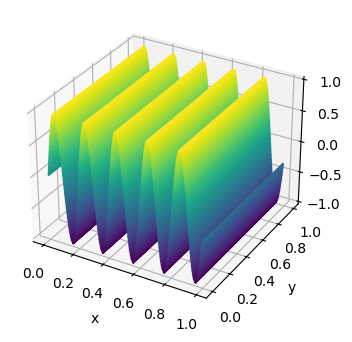

In [30]:
# Now we do some plotting:
fig = plt.figure(figsize=(11,4))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_f, 100, cmap='viridis') # Creates 'n=100' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

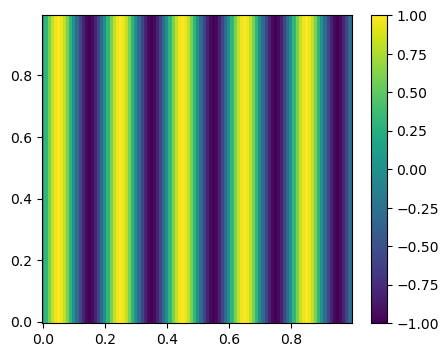

In [31]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, Z_f, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

### Fourier transform in 2D

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html

In [32]:
print(Z_f.shape)

(100, 100)


In [33]:
# Unshifted Fourier signal

fourier_Z_f = np.fft.fft2(Z_f)

print(fourier_Z_f.shape)

(100, 100)


In [34]:
print(np.max(abs(fourier_Z_f)))

5000.0


In [35]:
# Shifted signal:

shifted_fourier_Z_f = np.fft.fftshift(fourier_Z_f)

print(fourier_Z_f.shape)

# Norms

norm_fourier_Z_f = np.abs(fourier_Z_f)
norm_shifted_Z_f = np.abs(shifted_fourier_Z_f)

(100, 100)


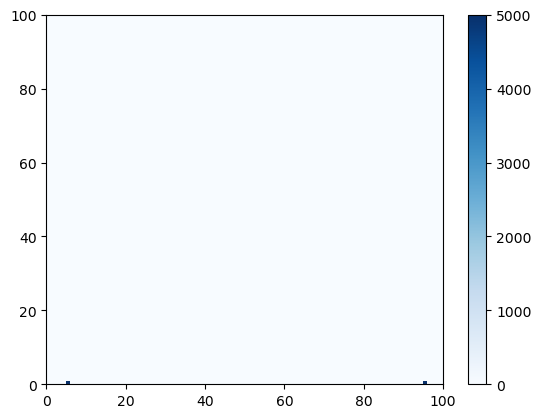

In [39]:
# Plotting Fourier image:

plt.figure()

Z = plt.pcolor(norm_fourier_Z_f, cmap = "Blues")

#plt.xlim(-10, 1010)
#plt.ylim(-10, 1010)

plt.colorbar(Z)

plt.show()

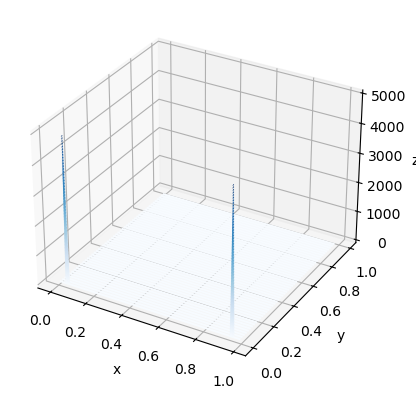

In [40]:
# Now we do some plotting:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='Blues') # Creates 'n=100' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Spatial Frequencies:

https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

In [43]:
freqs_x = np.fft.fftfreq(Z_f.shape[0], d=d_spacing)

freqs_y = np.fft.fftfreq(Z_f.shape[1], d=d_spacing)

#print(freqs_x)

#print(sorted(freqs_x))

# Creating mesh:

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

#print(sorted(freqs_x))

### Fourier image on the frequency mesh:

### Unshifted Fourier signal:

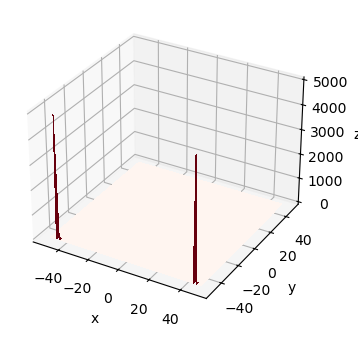

In [44]:
# Now we do some plotting:
fig = plt.figure(figsize = (5,4))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, norm_fourier_Z_f, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Shifted Fourier transform:

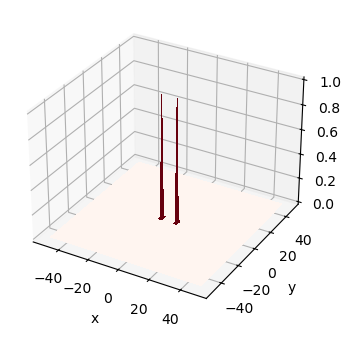

In [45]:
# Now we do some plotting:
fig = plt.figure(figsize = (5,4))

ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, norm_fourier_Z_f, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface
surf = ax.plot_surface(freqs_X, freqs_Y, (2/norm_shifted_Z_f.size)*norm_shifted_Z_f, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## 2D projection of the Fourier transform:

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_37993/3914034374.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f) , shading='auto', cmap = "Reds", vmin = -1, vmax= 1)
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_37993/3914034374.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


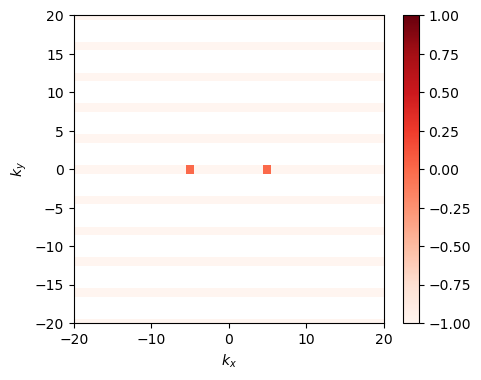

In [46]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f) , shading='auto', cmap = "Reds", vmin = -1, vmax= 1)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.colorbar(Z1)

plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")

plt.show()

In [48]:
print(freqs_y.shape)

(100,)


In [50]:
slice_ky0 = np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[norm_shifted_Z_f.shape[0]//2,:]

slice_ky0_2 = ((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[freqs_y.shape[0]//2,:]

print(slice_ky0.shape)

(100,)


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_37993/3718554571.py:1: RuntimeWarning: divide by zero encountered in log10
  slice_ky0 = np.log10((2/norm_shifted_Z_f.size)*norm_shifted_Z_f)[norm_shifted_Z_f.shape[0]//2,:]


(-20.0, 20.0)

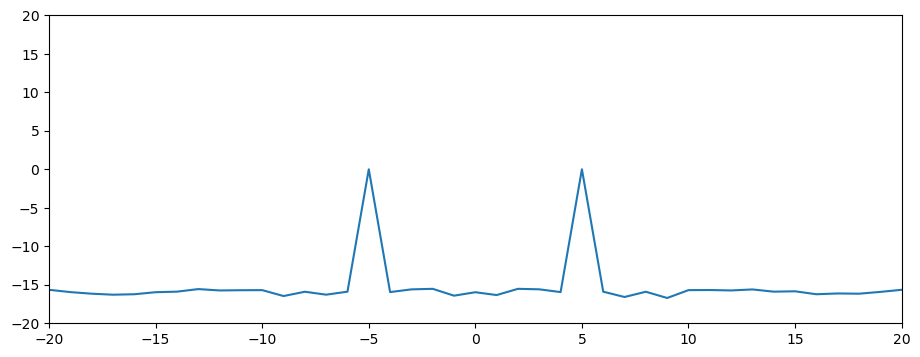

In [51]:
plt.figure(figsize=(11,4))

plt.plot(sorted(freqs_x),slice_ky0)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

(0.0, 2.0)

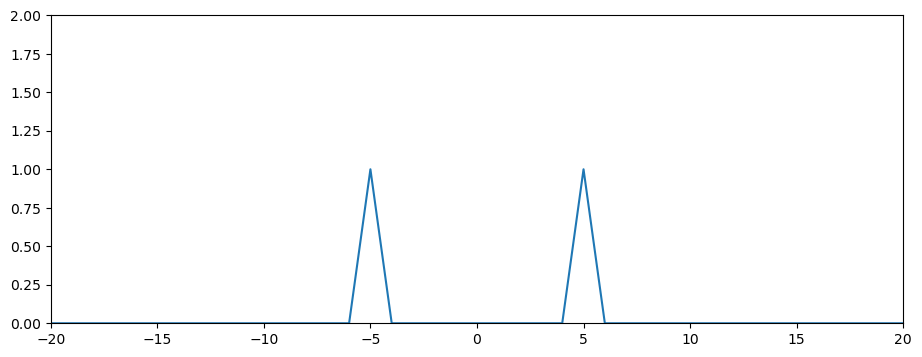

In [52]:
plt.figure(figsize=(11,4))

plt.plot(sorted(freqs_x),slice_ky0_2)

plt.xlim(-20, 20)
plt.ylim(0, 2)


In [53]:
from scipy.signal import find_peaks

In [54]:
peaks, properties = find_peaks(slice_ky0, height=0)

print(peaks)

[45 55]


In [55]:
freq_array_x = sorted(freqs_x)

#print(freq_array_x)
print("The characteristic frequencies are: ", freq_array_x[peaks[0]], freq_array_x[peaks[1]])

The characteristic frequencies are:  -5.0 5.0


## Exercise:

Given the following 2D functions:

$f_1(x,y) = \sin(\alpha\,x)+ \sin(4\alpha\,x)$

$f_2(x,y) = \sin(\alpha\,x) + \sin(4\alpha\,x) + \sin(8\alpha\,x) + \sin(2\alpha\,y)$

(a) Make a 3D plot of the surfaces they represent.


(b) Make 2D projections of these surfaces onto the XY plane.


(c) Calculate their 2D Fourier transforms, including the frequency axes.


(d) Calculate their characteristic (spatial) frequencies and compare with the analytical inputs.

## Solution for: $f_1(x,y)$

In [56]:
def function_2Dn(x, y, alpha):
    """
    Function to get the first surface,
    """
    return np.sin(alpha*x) + np.sin(4*alpha*x)

In [57]:
# Spacing for vectors (sampling)
d_spacing = 0.001

# Define the vectors
x = np.arange(0, 1, d_spacing)
y = np.arange(0, 1, d_spacing)

# Define the input frequency -> to be seen in Fourier space
alpha = 10*np.pi  #->  We expect 2 k: 5 m^{-1}, 20 m^{-1}

# Create the meshgrid
X, Y = np.meshgrid(x,y)

# Call the surface function
Z_fn = function_2Dn(X, Y, alpha)

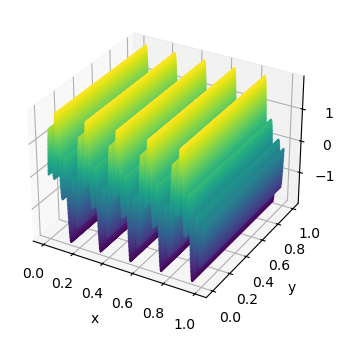

In [58]:
# Now we do some plotting:
fig = plt.figure(figsize= (5,4))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_fn, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

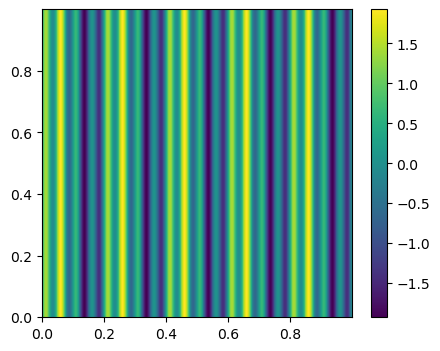

In [59]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, Z_fn, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

In [60]:
# Fourier transform the image
fourier_Zn = np.fft.fft2(Z_fn)

# Get characteristic frequencies
freqs_x = np.fft.fftfreq(Z_fn.shape[0], d = d_spacing)
freqs_y = np.fft.fftfreq(Z_fn.shape[1], d = d_spacing)

# We create the grid for Fourier space
freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

# We shift the Fourier image
fourier_Z2n = np.fft.fftshift(fourier_Zn)

# We get the norm of the Fourier image
norm_fourier_Z2n = np.abs(fourier_Z2n)

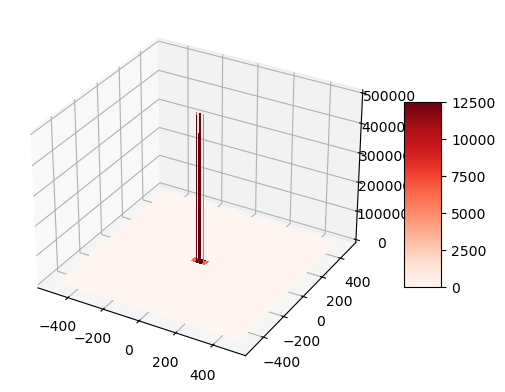

In [61]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(freqs_X, freqs_Y, norm_fourier_Z2n, cmap = "Reds", linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_37993/3579599089.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Z2n), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_37993/3579599089.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


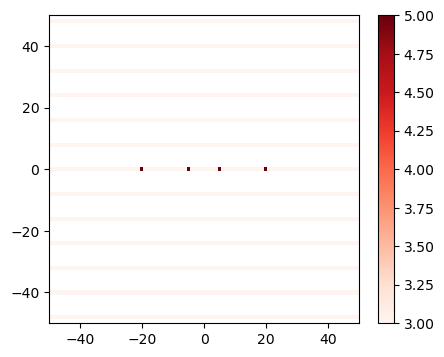

In [62]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Z2n), cmap = "Reds", vmin = 3, vmax = 5, shading='auto')

plt.colorbar(Z1)

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.show()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_37993/3770780253.py:1: RuntimeWarning: divide by zero encountered in log10
  slice_1D2 = np.log10(np.abs((2/fourier_Z2n.size)*fourier_Z2n))[500,:]


(-50.0, 50.0)

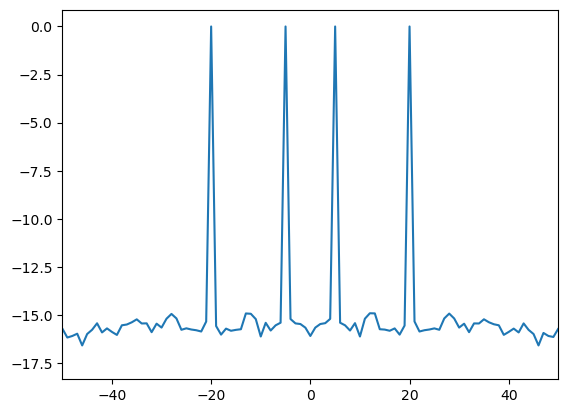

In [63]:
slice_1D2 = np.log10(np.abs((2/fourier_Z2n.size)*fourier_Z2n))[500,:]

%matplotlib inline
#plt.plot(sorted(freqs_x), slice_1D1)
plt.plot(sorted(freqs_x), slice_1D2)

plt.xlim(-50,50)

In [64]:
peaks, properties = find_peaks(slice_1D2, height=-1.)

print(peaks)

freq_array_x = sorted(freqs_x)

#print(freq_array_x)
print("The characteristic frequencies are: ", freq_array_x[peaks[0]], freq_array_x[peaks[1]])
print("The characteristic frequencies are: ", freq_array_x[peaks[2]], freq_array_x[peaks[3]])

[480 495 505 520]
The characteristic frequencies are:  -20.0 -5.0
The characteristic frequencies are:  5.0 20.0


# Solution for: $f_2(x,y)$:


$f_2(x,y) = \sin(\alpha\,x) + \sin(4\alpha\,x) + \sin(8\alpha\,x) + \sin(2\alpha\,y)$

In [65]:
def function_2Dn(x, y, alpha):
    """Function for the second surface"""
    
    return np.sin(alpha*x) + np.sin(4*alpha*x)\
           + np.sin(8*alpha*x) + 2*np.sin(2*alpha*y)

In [66]:
d_spacing = 0.001

x = np.arange(0, 1, d_spacing)
y = np.arange(0, 1, d_spacing)

# Define the input frequency
alpha = 10*np.pi

X, Y = np.meshgrid(x, y)

Z_fn = function_2Dn(X, Y, alpha)

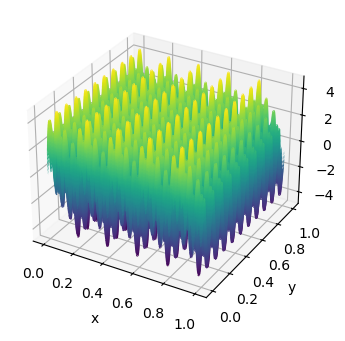

In [67]:
# Now we do some plotting:
fig = plt.figure(figsize= (5,4))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z_fn, 100, cmap='viridis') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

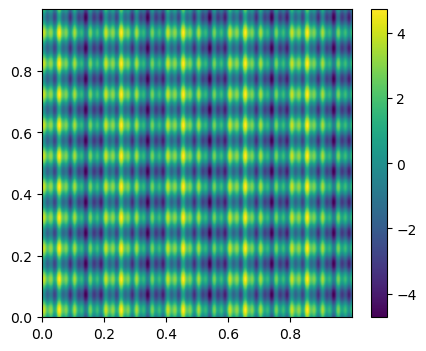

In [68]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(X, Y, Z_fn, shading='auto', cmap = "viridis")

plt.colorbar(Z1)

plt.show()

In [69]:
fourier_Zn = np.fft.fft2(Z_fn)

freqs_x = np.fft.fftfreq(Z_fn.shape[0], d = d_spacing)
freqs_y = np.fft.fftfreq(Z_fn.shape[1], d = d_spacing)

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

fourier_Z2n = np.fft.fftshift(fourier_Zn)

norm_fourier_Z2n = np.abs(fourier_Z2n)

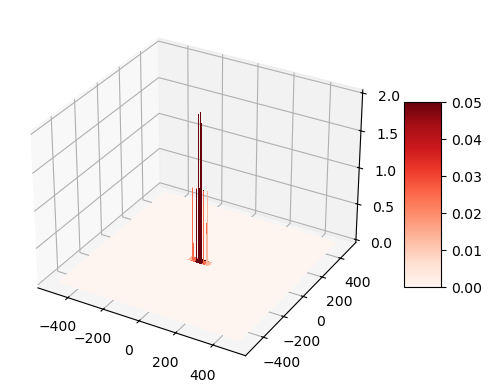

In [70]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(freqs_X, freqs_Y, 2*norm_fourier_Z2n/fourier_Z2n.size, cmap = "Reds", linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

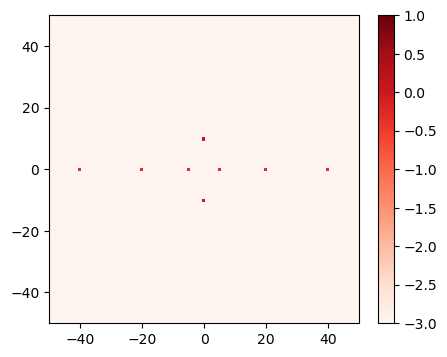

In [71]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10(norm_fourier_Z2n/fourier_Z2n.size), cmap = "Reds", vmin = -3, vmax = 1, shading='auto')

plt.colorbar(Z1)

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.show()

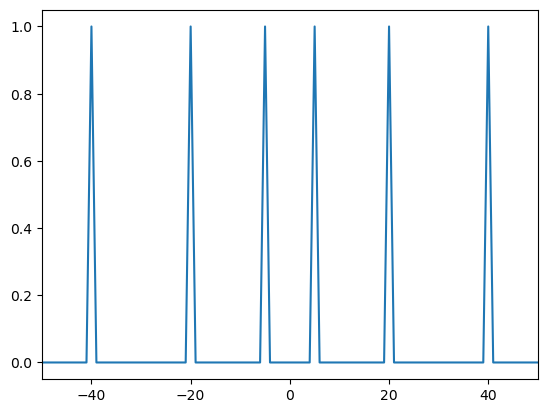

In [72]:
slice_1D2 = np.abs(2*fourier_Z2n/fourier_Z2n.size)[500,:]

%matplotlib inline
#plt.plot(sorted(freqs_x), slice_1D1)
plt.plot(sorted(freqs_x),slice_1D2)

plt.xlim(-50,50)

plt.show()

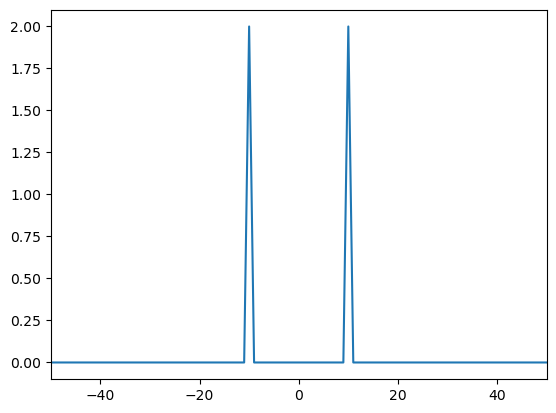

In [73]:
slice_1D2 = np.abs(2*fourier_Z2n/fourier_Z2n.size)[:,500]

%matplotlib inline
#plt.plot(sorted(freqs_x), slice_1D1)
plt.plot(sorted(freqs_x),slice_1D2)

plt.xlim(-50,50)

plt.show()